In [1]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from autorocks.data.loader.all_models_result_aggregator import create_all_models_comparison_dataset

# Viz cell

import autorocks.viz.viz as viz
from autorocks.dir_struct import RootDir

exp_dir = RootDir.parent / "local_execution/synthetic/target/Akcley/6_params/100_iter"
model_comparison_data = create_all_models_comparison_dataset(exp_dir)

In [3]:
model_comparison_data = viz.unify_model_name(model_comparison_data)
color_palette = viz.create_color_palette(model_comparison_data)

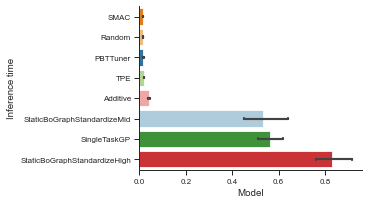

In [4]:
viz.model_perf_plot(
    model_perf_df=model_comparison_data.model_performance,
    model_palette_map=color_palette,
    comparison_col="inference_time",
)

No handles with labels found to put in legend.


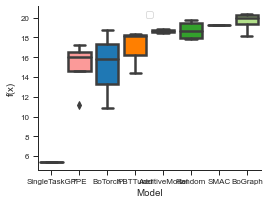

In [5]:
viz.perf_boxplot(
    perf_df=model_comparison_data.system_performance,
    optimization_type=viz.OptimizationType.MINIMIZE,
    ylabel="f(x)",
    comparison_col="target",
    model_palette_map=color_palette,
    horizontal_line=0,
)

In [126]:
convergence_df = model_comparison_data.system_performance.copy()
convergence_df["rolling"] = convergence_df.groupby(["model", "iteration"]).agg(
    f"cum{str(viz.OptimizationType.MINIMIZE)}"
)["target"]

In [127]:
import pandas

convergence_df = convergence_df[["rolling", "model", "iteration", "step"]]
optimal_line = [{"rolling": 0, "model": "Optimal", "iteration": 0, "step": i} for i in range(100)]
convergence_df = convergence_df.append(pandas.DataFrame(optimal_line, index=range(100))).reset_index(drop=True)

In [120]:
color_palette["Optimal"] = "red"
fig = viz.convergence_lineplot(
    convergence_df=convergence_df,  # model_comparison_data_c.system_performance,
    optimization_type=viz.OptimizationType.MINIMIZE,
    # model_baseline="Optimal",
    column_name="rolling",
    model_palette_map=color_palette,
    ylabel="f(x)",
)

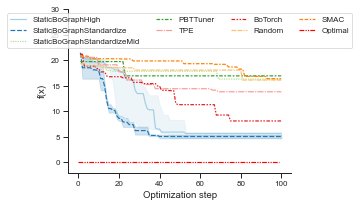

In [121]:
fig.axes[0].set(ylim=[-2, 30])
fig